<a href="https://colab.research.google.com/github/ParthikB/Vohoo-FastAI/blob/master/lesson_1%7CPets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *

# Downloading and creating the Dataset

In [7]:
# Downloading the Data
path = untar_data(URLs.PETS) ; path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
# Joining the respectinve dirs
images_path = path/'images'
annot_path = path/'annotations'

In [14]:
# Getting the whole path of the images present inside the images dir
fnames = get_image_files(images_path); fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_119.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_121.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_setter_177.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_134.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/beagle_124.jpg')]

In [0]:
# Writing a Regex Function to extract out the label (which we can see is the filename of the respective image.)
pattern = r'/([^/]+)_\d+.jpg$'

### Creating a ImageDataBunch Object

In [20]:
BATCH_SIZE = 64

data = ImageDataBunch.from_name_re(path=images_path,
                                   fnames=fnames,
                                   pat=pattern,
                                   ds_tfms=get_transforms(),
                                   size=224,
                                   bs=BATCH_SIZE).normalize(imagenet_stats)

data
# imagenet_stats > ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
#                     mean of 3-channels      std of 3-channels

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
american_bulldog,english_setter,Maine_Coon,British_Shorthair,newfoundland
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
american_pit_bull_terrier,american_bulldog,leonberger,beagle,beagle
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

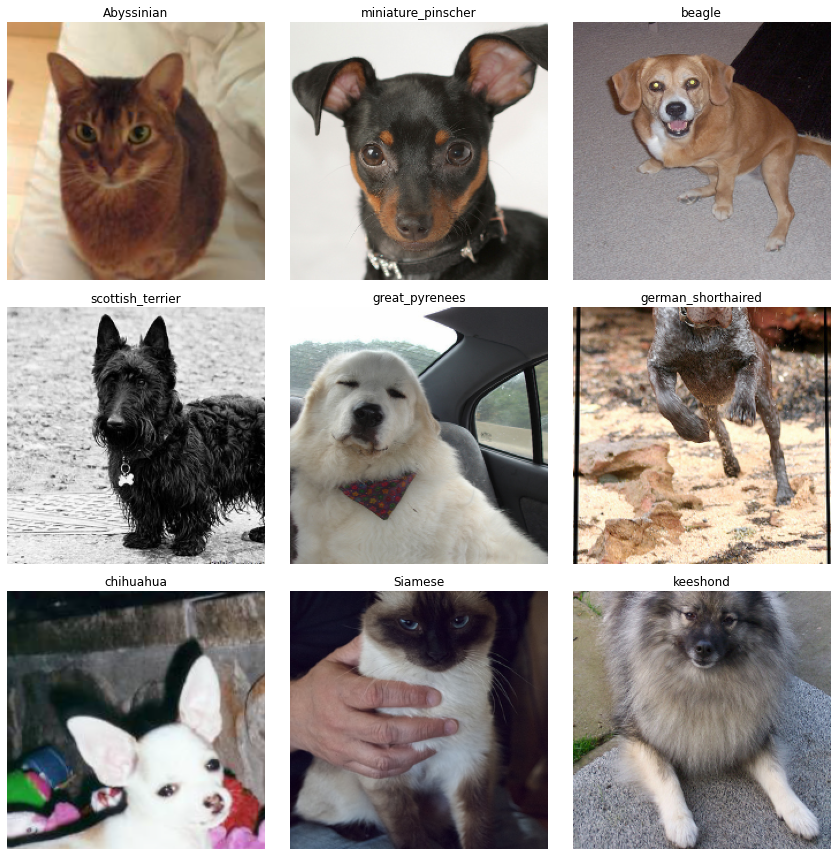

In [24]:
# Visualizing the Dataset

data.show_batch(rows=3)